**Turbine dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Data.csv")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
# AT – Ambient Temperature
#V – Exhaust Vacuum
#AP – Ambient Pressure
#RH – Relative Humidity
#PE – Net Hourly Electrical Energy Output (target variable)

df = df.rename(columns={
    'AT':'Ambient_Temperature',
    'V':'Exhaust_Vacuum',
    'AP':'Ambient_Pressure',
    'RH':'Relative_Humidity',
    'PE':'Net_Hourly_Electrical_Energy_Output'})

In [ ]:
df

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Net_Hourly_Electrical_Energy_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
df.head()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Net_Hourly_Electrical_Energy_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.tail()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Net_Hourly_Electrical_Energy_Output
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ambient_Temperature                  9568 non-null   float64
 1   Exhaust_Vacuum                       9568 non-null   float64
 2   Ambient_Pressure                     9568 non-null   float64
 3   Relative_Humidity                    9568 non-null   float64
 4   Net_Hourly_Electrical_Energy_Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isnull().sum()

,0
Ambient_Temperature,0
Exhaust_Vacuum,0
Ambient_Pressure,0
Relative_Humidity,0
Net_Hourly_Electrical_Energy_Output,0


In [ ]:
df.shape

(9568, 5)

In [ ]:
df.duplicated().sum()

np.int64(41)

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.shape

(9527, 5)

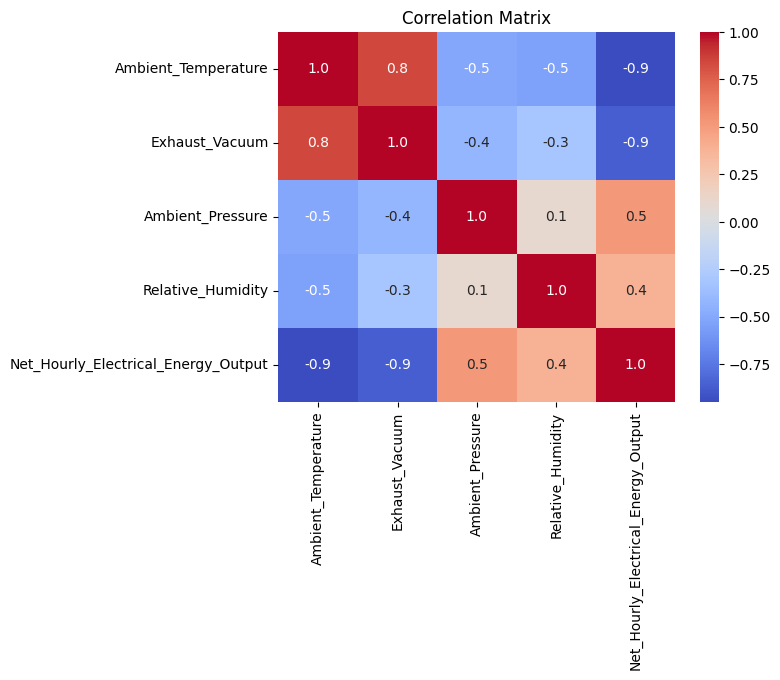

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix,annot=True,fmt ='0.01f',cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

In [ ]:
df.drop('Exhaust_Vacuum',axis=1,inplace=True) #Exhaust_Vacuum and ambient_temperature have same coliinearity with target (0.9)

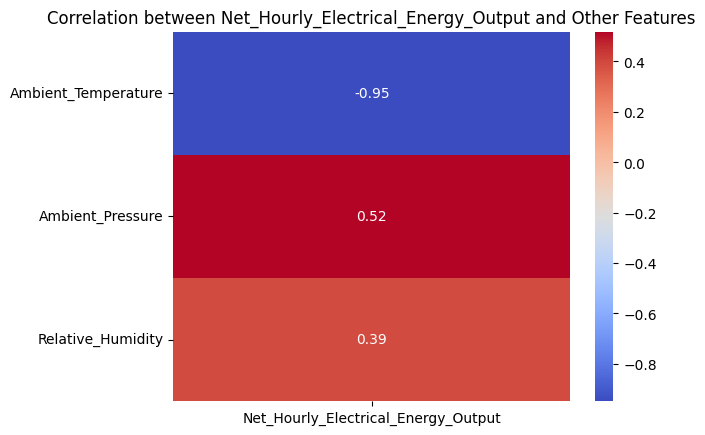

In [ ]:
Net_Hourly_Electrical_Energy_Output_corr = df.corr()['Net_Hourly_Electrical_Energy_Output']

Net_Hourly_Electrical_Energy_Output_corr = Net_Hourly_Electrical_Energy_Output_corr.drop('Net_Hourly_Electrical_Energy_Output')

sns.heatmap(Net_Hourly_Electrical_Energy_Output_corr.to_frame(),annot=True,fmt='.2f',cmap='coolwarm')

plt.title('Correlation between Net_Hourly_Electrical_Energy_Output and Other Features')

plt.show()

<Axes: >

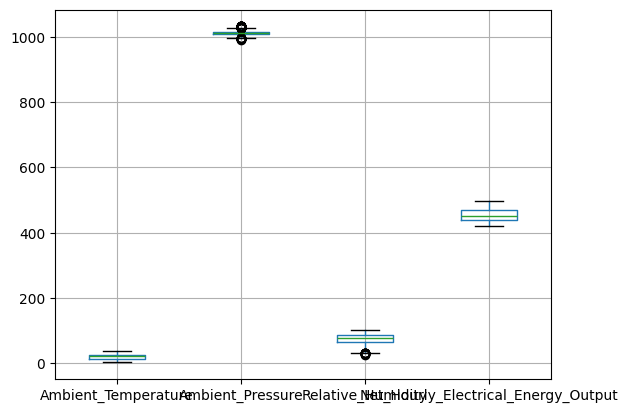

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

df_cleaned = remove_outliers_iqr(df,exclude_column='Net_Hourly_Electrical_Energy_Output')
df=df_cleaned

In [ ]:
df.shape

(9425, 4)

In [ ]:
x = df[['Ambient_Temperature','Ambient_Pressure','Relative_Humidity']]
y = df['Net_Hourly_Electrical_Energy_Output']

In [ ]:
df

,Ambient_Temperature,Ambient_Pressure,Relative_Humidity,Net_Hourly_Electrical_Energy_Output
0,14.96,1024.07,73.17,463.26
1,25.18,1020.04,59.08,444.37
2,5.11,1012.16,92.14,488.56
3,20.86,1010.24,76.64,446.48
4,10.82,1009.23,96.62,473.90
...,...,...,...,...
9563,16.65,1014.01,91.00,460.03
9564,13.19,1023.67,66.78,469.62
9565,31.32,1012.92,36.48,429.57
9566,24.48,1013.86,62.39,435.74


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([Dense(64,input_shape=(3,),activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(1)])  # regression so outlayer is 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(), loss='mse')

In [ ]:
model.fit(x_train,y_train,epochs=2500)

Epoch 1/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 53577.1016
Epoch 2/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 203.1624
Epoch 3/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189.4976
Epoch 4/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180.2301
Epoch 5/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 161.2753
Epoch 6/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 144.9007
Epoch 7/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 124.1158
Epoch 8/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 106.5907
Epoch 9/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89.0611
Epoch 10/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 75.2054
Epoch 11/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.8452
Epoch 12/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.5216
Epoch 13/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43.2946
Epoch 14/2500
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.1326
Epoc

KeyboardInterrupt: 

In [ ]:
test_loss = model.evaluate(x_test,y_test)
print(f'\nTest Loss: {test_loss}')         # test loss near to zero